このPython コードは、PyMC を使ってMCMCサンプリングを行います。
* 2025年8月時点では、Google Colaboratory環境では PyMC がそのまま使えますので、実行可能です。
* ローカルな計算機環境では、PyMC パッケージが含まれていないのが一般的です。
    * 例えば、Anaconda などの Distribution では、以下の例の様に、PyMC環境を用意する必要があります。
        ```
        conda create -c conda-forge -n pymc_env pymc
        conda activate pymc_env
        conda install conda-forge::ipywidgets
        conda install scikit-learn
        ```
        * これで VS codeの実行時のPython環境に、```pymc_env```を選択します。

In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Chap02/'
OutputDir    = '2Prior-060105Laplace/'
FileBaseName = '2Prior-060105Laplace'

* Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/


* 必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
print('numpy      Ver.', np.__version__)
#
############################################
# https://docs.pymc.io/
import pymc as pm
import time
print('pymc       Ver.', pm.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.10.0
numpy      Ver. 1.26.4


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


pymc       Ver. 5.16.1
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2Prior-060105Laplace/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2Prior-060105Laplace/


L1正則化は、パラメータの事前確率にラプラス(Laplace)分布を設定したベイズ推定のMAP推定に該当する。
* https://www.pymc.io/projects/docs/en/stable/api/distributions/generated/pymc.Laplace.html
* 確率分布関数は以下の通りである。
$$
f(x|\mu,b)
=
\frac{1}{2b}
\exp
\left(
  -
  \frac{
    |x-\mu|
  }{b}
\right)
$$

In [4]:
############################################
# ラプラス(Laplace)分布
from scipy.special import iv
#
pi2 = 2 * np.pi
#
def PLaplace(x, mu, b):
  return np.exp( - np.abs(x - mu)/b ) / (2 * b)

In [5]:
############################################
mu1    = 0.0
b1     = 1.0
mu2    = 0.0
b2     = 2.0
mu3    = 0.0
b3     = 4.0
mu4    = -5.0
b4     = 4.0

In [6]:
############################################
xx = np.linspace( -10.0, +10.0, num=100)
PLaplace1 = PLaplace( xx, mu1, b1)
PLaplace2 = PLaplace( xx, mu2, b2)
PLaplace3 = PLaplace( xx, mu3, b3)
PLaplace4 = PLaplace( xx, mu4, b4)

In [7]:
############################################
with pm.Model() as  model:
    Lap1 = pm.Laplace('Laplace1',mu=mu1,b=b1)
    Lap2 = pm.Laplace('Laplace2',mu=mu2,b=b2)
    Lap3 = pm.Laplace('Laplace3',mu=mu3,b=b3)
    Lap4 = pm.Laplace('Laplace4',mu=mu4,b=b4)
    Laplace1 = pm.draw( Lap1, draws=100000)
    Laplace2 = pm.draw( Lap2, draws=100000)
    Laplace3 = pm.draw( Lap3, draws=100000)
    Laplace4 = pm.draw( Lap4, draws=100000)

In [8]:
############################################
def GrfHist(Dist, xx, yy, mu, b):
    hlabel = r'Laplace($\mu$=%.2f, $b$=%.2f)' % (mu, b)
    ########################################
    plt.rcParams['font.size'] = 16
    #
    fig = plt.figure( figsize=(6,6) )
    fig.subplots_adjust(left=0.18,
                        right=0.97,
                        top=0.94,
                        bottom=0.1)
    #
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel( r'$x$')
    ax1.set_xlim( np.amin(xx), np.amax(xx) )
    ax1.set_ylabel( 'Distribution' )
    #
    bin_values, bins, patches = ax1.hist(
        Dist,
        bins=100, density=True,
        label=hlabel)
    #
    bin_values_max = np.amax( bin_values )
    #
    (y_bot, y_top) = ax1.set_ylim((0,bin_values_max * 1.2))
    #
    ax1.plot( xx,yy )
    #
    plt.title( hlabel )
    #
    plt.legend()
    #
    plt.grid(True)
    #
    plt.show()
    #
    return fig

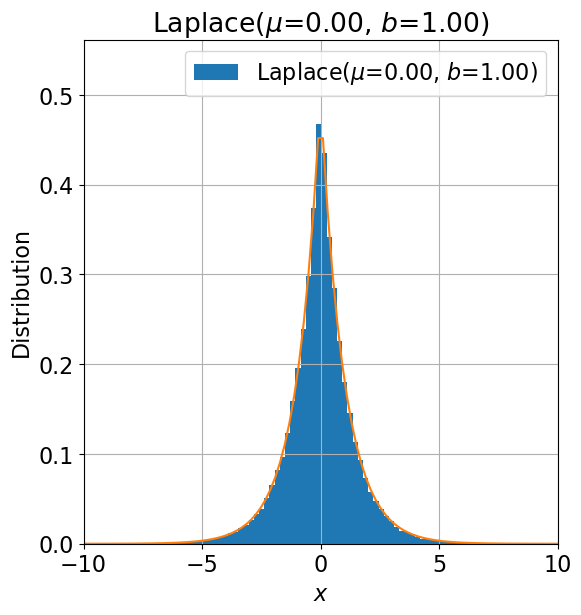

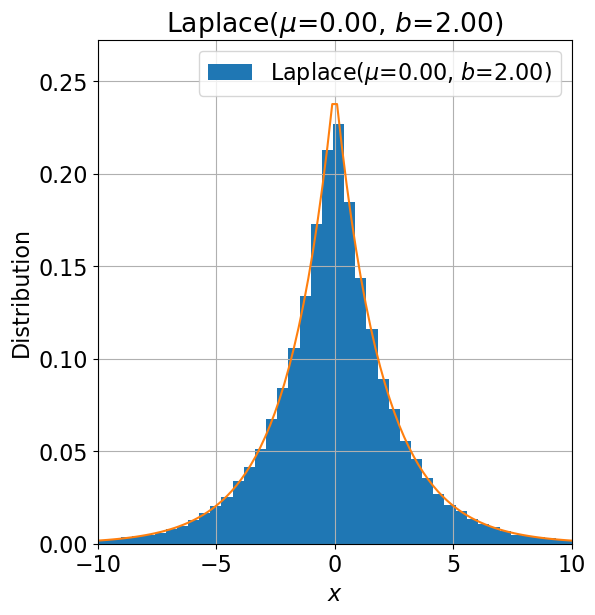

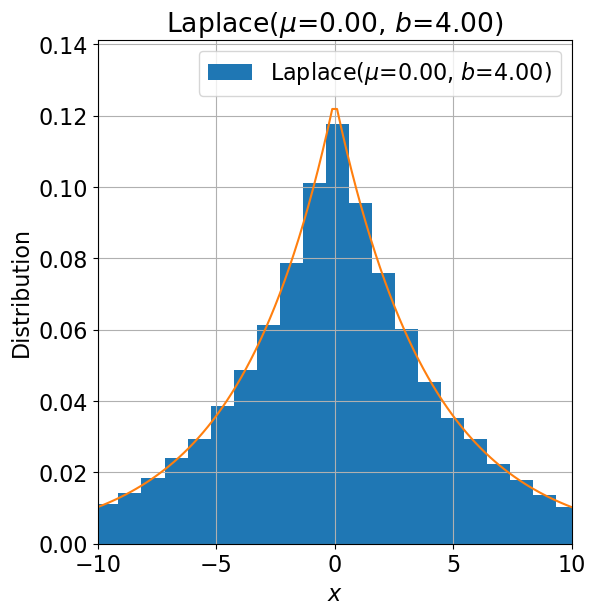

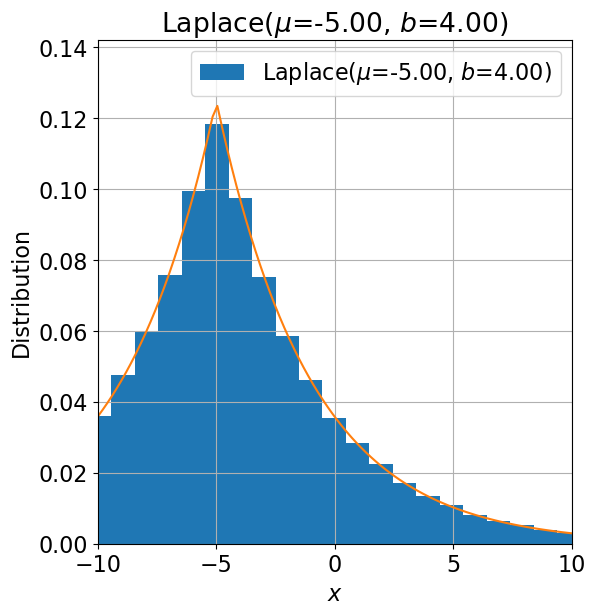

In [9]:
######################################
fig = GrfHist(Laplace1, xx, PLaplace1, mu1, b1)
pdfName = FilePath + FileBaseName + '-01.pdf'
fig.savefig( pdfName )
#
fig = GrfHist(Laplace2, xx, PLaplace2, mu2, b2)
pdfName = FilePath + FileBaseName + '-02.pdf'
fig.savefig( pdfName )
#
fig = GrfHist(Laplace3, xx, PLaplace3, mu3, b3)
pdfName = FilePath + FileBaseName + '-03.pdf'
fig.savefig( pdfName )
#
fig = GrfHist(Laplace4, xx, PLaplace4, mu4, b4)
pdfName = FilePath + FileBaseName + '-04.pdf'
fig.savefig( pdfName )